In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/test.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv


In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [148]:
k = pd.read_csv("../input/facial-keypoints-detection/SampleSubmission.csv")
print(k)

       RowId  Location
0          1         0
1          2         0
2          3         0
3          4         0
4          5         0
...      ...       ...
27119  27120         0
27120  27121         0
27121  27122         0
27122  27123         0
27123  27124         0

[27124 rows x 2 columns]


In [149]:
import zipfile

Dataset = "facial-keypoints-detection"

# Will unzip the files so that you can see them..
with zipfile.ZipFile("../input/"+Dataset+"/training"+".zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("../input/"+Dataset+"/test"+".zip","r") as z:
    z.extractall(".")
    
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

__notebook_source__.ipynb
face_key_detection_submission.csv
test.csv
training.csv



In [150]:
Train = pd.read_csv("./training.csv")
Test = pd.read_csv("./test.csv")

In [151]:
print(Train.T.head)

<bound method NDFrame.head of                                                                         0     \
left_eye_center_x                                                    66.0336   
left_eye_center_y                                                    39.0023   
right_eye_center_x                                                    30.227   
right_eye_center_y                                                   36.4217   
left_eye_inner_corner_x                                              59.5821   
left_eye_inner_corner_y                                              39.6474   
left_eye_outer_corner_x                                              73.1303   
left_eye_outer_corner_y                                                39.97   
right_eye_inner_corner_x                                             36.3566   
right_eye_inner_corner_y                                             37.3894   
right_eye_outer_corner_x                                             23.4529   
right_eye_

In [152]:
lookid_data = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')

In [153]:
Train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [154]:
Train.fillna(method = 'ffill',inplace = True)


In [155]:
Train.isnull().any().value_counts()

False    31
dtype: int64

In [156]:
imag = []
for i in range(0,7049):
    img = Train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

In [157]:
X_train.shape

(7049, 96, 96, 1)

In [158]:
training = Train.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [159]:
y_train.shape

(7049, 30)

In [160]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D

In [161]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_73 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_73 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_74 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_74 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 48, 48, 32)       

In [162]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [163]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)


Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 8s 1ms/step - loss: 351.7135 - mae: 11.9874 - val_loss: 94.0980 - val_mae: 8.4172
Epoch 2/50
5639/5639 [==============================] - 5s 904us/step - loss: 31.5572 - mae: 4.3436 - val_loss: 21.1062 - val_mae: 3.7709
Epoch 3/50
5639/5639 [==============================] - 5s 906us/step - loss: 25.6627 - mae: 3.8964 - val_loss: 22.4019 - val_mae: 3.9296
Epoch 4/50
5639/5639 [==============================] - 5s 914us/step - loss: 23.6097 - mae: 3.7298 - val_loss: 26.0199 - val_mae: 4.3690
Epoch 5/50
5639/5639 [==============================] - 5s 921us/step - loss: 22.3104 - mae: 3.6159 - val_loss: 14.5858 - val_mae: 3.0951
Epoch 6/50
5639/5639 [==============================] - 5s 907us/step - loss: 21.3538 - mae: 3.5326 - val_loss: 22.4739 - val_mae: 4.1328
Epoch 7/50
5639/5639 [==============================] - 5s 913us/step - loss: 19.5119 - mae: 3.3655 - val_loss: 34.8390 - va

In [164]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

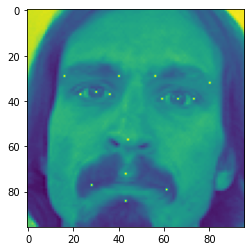

In [165]:
show_image(X_train[0], y_train[0])


In [166]:
timag = []
for i in range(0,1783):
    timg = Test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    timag.append(timg)
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1)

In [167]:
pred = model.predict(X_test)


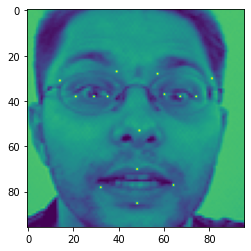

In [168]:
show_image(X_test[0], pred[0])

In [169]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key_detection_submission.csv',index = False)
